## **Predicting the Quarterly Revenue for Walmart**


In [24]:
# Importing Packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import sklearn.preprocessing
from sklearn.metrics import r2_score
import keras

from keras.layers import Dense,Dropout,SimpleRNN,GRU, Bidirectional,LSTM
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [25]:
# Reading the Data
df=pd.read_excel('Walmart Quarterly Revenue.xlsx')
df.head()

,Date,Quarterly Revenue
0,2009-01-31,108627
1,2009-04-30,94242
2,2009-07-31,100876
3,2009-10-31,99373
4,2010-01-31,113594


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               56 non-null     datetime64[ns]
 1   Quarterly Revenue  56 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB


In [27]:
# Setting Date as Index
df = df.set_index('Date')
df.head()

,Quarterly Revenue
Date,
2009-01-31,108627
2009-04-30,94242
2009-07-31,100876
2009-10-31,99373
2010-01-31,113594


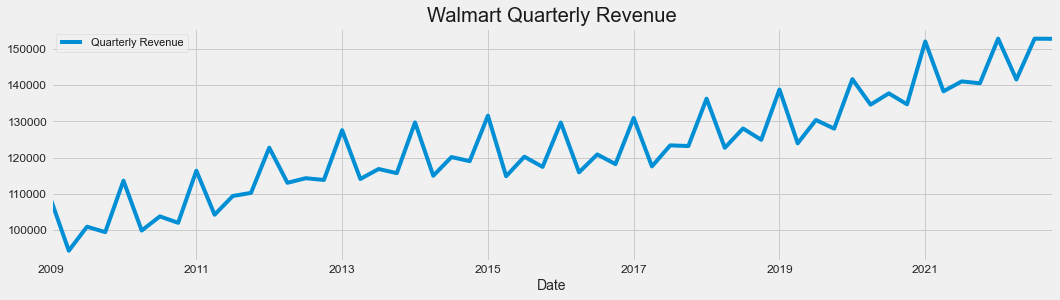

In [28]:
# Plotting the data
df.plot(figsize=(16,4),legend=True)
plt.title('Walmart Quarterly Revenue')
plt.show()

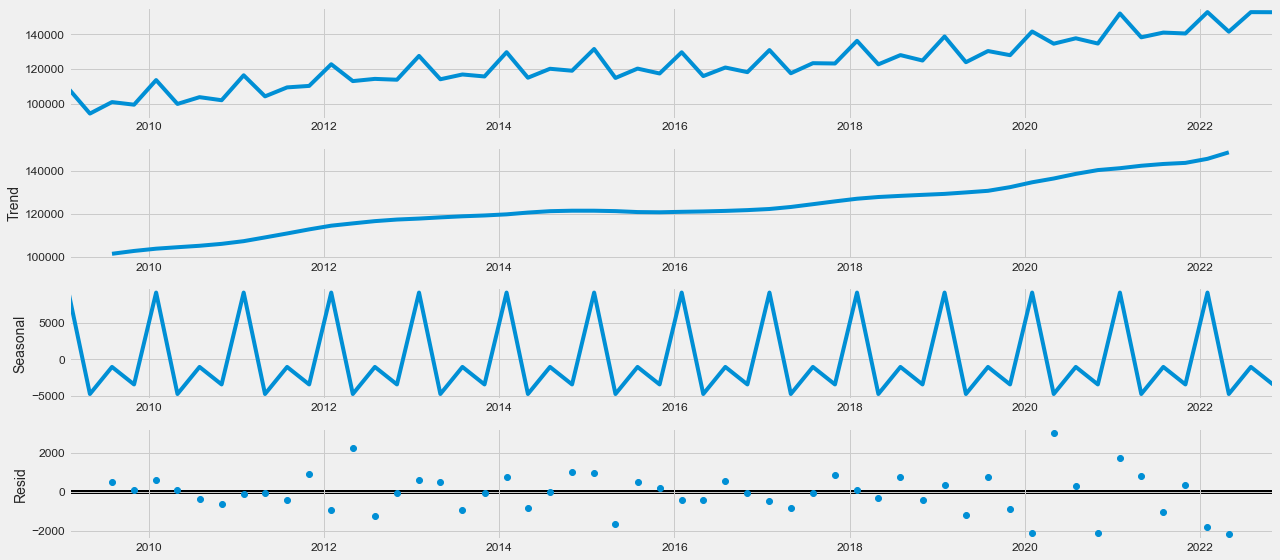

In [29]:
# Decomposition the data 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
plt.show()

C:\Users\ravit\AppData\Local\Temp\ipykernel_14256\2575482981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Quarterly Revenue']
C:\Users\ravit\AppData\Local\Temp\ipykernel_14256\2575482981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Quarterly Revenue']


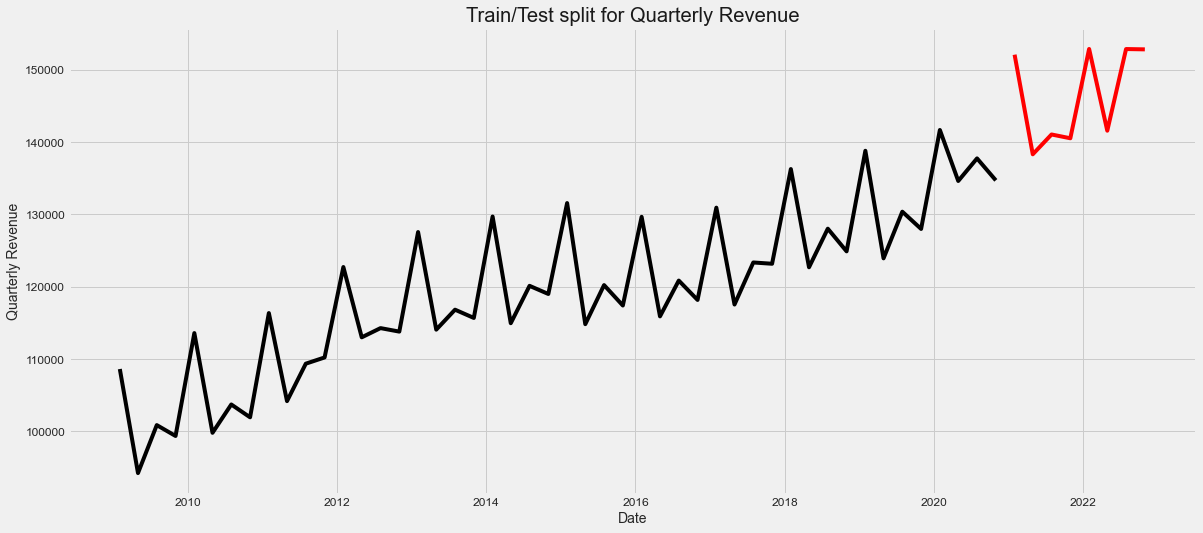

In [30]:
# Dividing the data into training and testing
# Ploting the data
import seaborn as sns 
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("2020-12", format='%Y-%m')]
train['train'] = train['Quarterly Revenue']
del train['Date']
del train['Quarterly Revenue']
test = df[df['Date'] >= pd.to_datetime("2020-12", format='%Y-%m')]
del test['Date']
test['test'] = test['Quarterly Revenue']
del test['Quarterly Revenue']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Quarterly Revenue")
plt.ylabel("Quarterly Revenue")
plt.xlabel('Date')
sns.set()
plt.show()

## **Arima Model**

In [31]:
# Applying ARIMA Model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=955.046, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1000.490, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=987.989, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=990.035, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=998.653, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=953.871, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=952.720, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=991.409, Time=0.07 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=952.424, Time=0.26 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=984.050, Time=0.08 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=952.498, Time=0.40 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=950.471, Time=0.

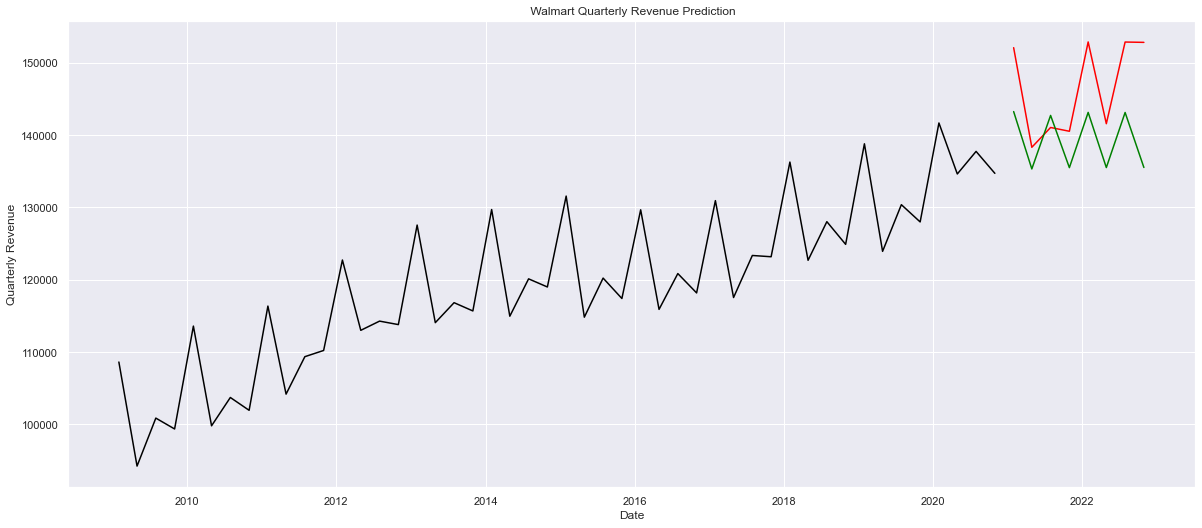

In [32]:
# Plotting the prediction
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")
plt.title(" Walmart Quarterly Revenue Prediction")
plt.ylabel("Quarterly Revenue")
plt.xlabel('Date')
sns.set()
plt.show()

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  8948.314010936627


## **SARIMA Model**

In [34]:
df=pd.read_excel('Walmart Quarterly Revenue.xlsx')
df = df.set_index('Date')

In [35]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1474.5164167195842


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT w

SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1457.9447016281874
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:952.519637158085


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2272.554174237391
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1270.2760507524097
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1264.9699598920888
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:930.7655856193502


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:957.8076172904981
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1441.369801440922
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1437.613115143723
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:936.8119338630217


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2065.7902890298324
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1435.0107916169118
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1436.7097723040142


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:955.1026527668782


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:922.5707483633531
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1169.8355519039444
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1156.0806725197617
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:801.5564436043198


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT w

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1885.9656268803765
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1148.1156021946779
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1140.8648759708105


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:803.0488596161001


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1805.8885120684006
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1156.6311988481334
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1174.7773207902521
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:799.518607039824


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1847.5754222671717
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1139.0402118202667


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1131.905681271885
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:801.4153841911004


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1821.7992390044149
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1198.1680963643992


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1160.48553569209
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:926.1257526725503


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2057.160041867024


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-sta

SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1093.4538835687538
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1090.7223804149817


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:922.7573710025605


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:967.573308419856
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1168.9239479256132


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1140.2217899000402


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1020.8176525267444


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-sta

SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1919.5079670629864


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-sta

SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1087.2967057384058


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1115.795821904741


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:982.1154619029907
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1155.5657957427857
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1171.0404023065232
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:798.9176711600961


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1808.8837544355165
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1136.3004082276252


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1130.6119339210397
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:800.8636332505072


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1808.611284487299
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1116.165102713063
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1169.4033601818896


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:798.1015021141081


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1812.8404531213596


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1113.157384867198


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1113.733675408194
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:800.0982749912866


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1920.6025665694435


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
#Fitting the SARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5736      0.586     -0.978      0.328      -1.723       0.576
ma.L1          0.4940      0.632      0.781      0.435      -0.745       1.733
ar.S.L12       0.0019      0.164      0.011      0.991      -0.320       0.324
sigma2      6.155e+06   2.96e-08   2.08e+14      0.000    6.15e+06    6.15e+06


In [38]:
prediction = result.get_prediction(start = pd.to_datetime('2021-04-30'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Quarterly Revenue,upper Quarterly Revenue
2021-04-30,133299.243433,143023.993306
2021-07-31,138972.339021,148697.088894
2021-10-31,133165.550097,142890.299970
2022-01-31,149300.397194,159025.147067
2022-04-30,133392.899885,143117.649758
2022-07-31,142751.969848,152476.719722
2022-10-31,145428.832133,155153.582006


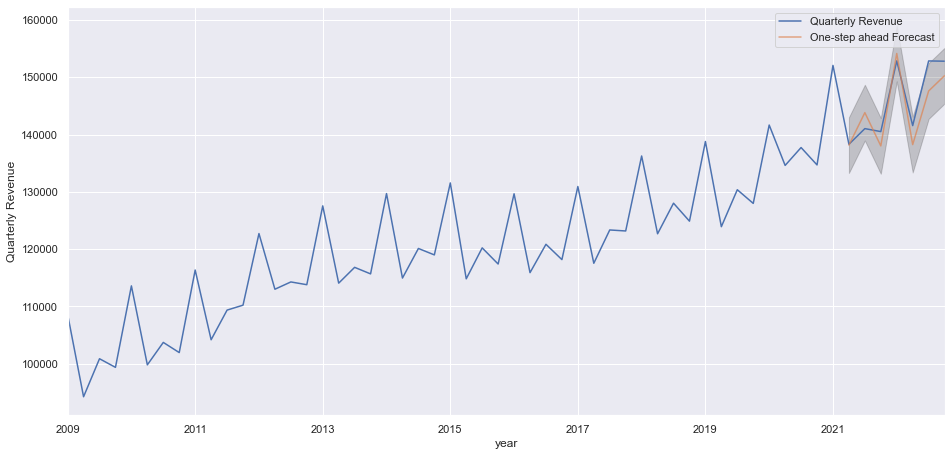

In [39]:
#Visualize the forecasting
ax = df['2009':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("year")
ax.set_ylabel('Quarterly Revenue')
plt.legend()
plt.show()

In [40]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)

from sklearn.metrics import mean_squared_error

y_hat = prediction.predicted_mean
y_truth = df['2021-04-30':]
mse = mean_squared_error(y_truth,y_hat)
rmse = np.sqrt(mse)

print('The Mean Squared Error of our forecasts is', mse)
print('The Root Mean Squared Error of our forecasts is', rmse)

The Mean Squared Error of our forecasts is 8648353.268182157
The Root Mean Squared Error of our forecasts is 2940.808267837629


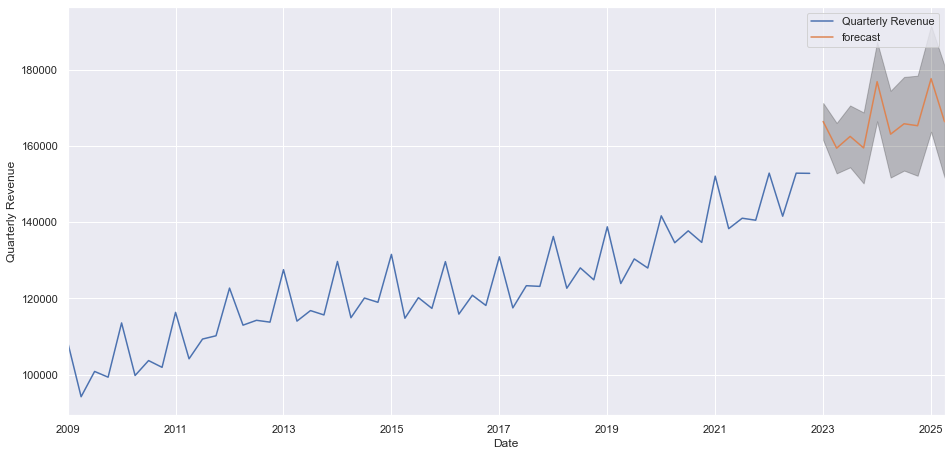

In [41]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = df.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quarterly Revenue')

plt.legend()
plt.show()


## **DNN MODEL**

In [42]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X).astype('int'), np.array(Y).astype('int')

In [43]:
df=pd.read_excel('Walmart Quarterly Revenue.xlsx')

df = df.set_index('Date')


In [44]:
df1 = df
#Split data set into testing dataset and train dataset
train_size = 49
train, test =df1.values[0:train_size,:],df1.values[train_size:len(df1.values),:]
# setup look_back window 
look_back = 4
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [46]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=500, batch_size=4, verbose=1, validation_data=(testX,testY),shuffle=False)

Epoch 1/500
12/12 [==============================] - 1s 16ms/step - loss: 17379080192.0000 - mse: 17379080192.0000 - mae: 131621.1875 - val_loss: 21999052800.0000 - val_mse: 21999052800.0000 - val_mae: 148240.0156
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 12832726016.0000 - mse: 12832726016.0000 - mae: 113052.1875 - val_loss: 15932937216.0000 - val_mse: 15932937216.0000 - val_mae: 126136.8750
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 9045407744.0000 - mse: 9045407744.0000 - mae: 94868.5781 - val_loss: 10838700032.0000 - val_mse: 10838700032.0000 - val_mae: 104005.6172
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 5943562752.0000 - mse: 5943562752.0000 - mae: 76815.9219 - val_loss: 6807878144.0000 - val_mse: 6807878144.0000 - val_mae: 82382.6172
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 3581512448.0000 - mse: 3581512448.0000 - mae: 59482.8984 - val_loss: 3852875776.000

Epoch 42/500
12/12 [==============================] - 0s 4ms/step - loss: 44368656.0000 - mse: 44368656.0000 - mae: 5710.4131 - val_loss: 28026330.0000 - val_mse: 28026330.0000 - val_mae: 4339.0571
Epoch 43/500
12/12 [==============================] - 0s 4ms/step - loss: 43776184.0000 - mse: 43776184.0000 - mae: 5670.9634 - val_loss: 27889960.0000 - val_mse: 27889960.0000 - val_mae: 4328.1929
Epoch 44/500
12/12 [==============================] - 0s 4ms/step - loss: 43452068.0000 - mse: 43452068.0000 - mae: 5644.0449 - val_loss: 27494262.0000 - val_mse: 27494262.0000 - val_mae: 4281.5156
Epoch 45/500
12/12 [==============================] - 0s 4ms/step - loss: 43339328.0000 - mse: 43339328.0000 - mae: 5639.4951 - val_loss: 27528296.0000 - val_mse: 27528296.0000 - val_mae: 4293.7759
Epoch 46/500
12/12 [==============================] - 0s 4ms/step - loss: 42985884.0000 - mse: 42985884.0000 - mae: 5617.1182 - val_loss: 27618930.0000 - val_mse: 27618930.0000 - val_mae: 4313.4946
Epoch 47/5

12/12 [==============================] - 0s 3ms/step - loss: 32729330.0000 - mse: 32729330.0000 - mae: 4873.3462 - val_loss: 28729520.0000 - val_mse: 28729520.0000 - val_mae: 4671.4897
Epoch 84/500
12/12 [==============================] - 0s 3ms/step - loss: 32538920.0000 - mse: 32538920.0000 - mae: 4859.1040 - val_loss: 29170784.0000 - val_mse: 29170784.0000 - val_mae: 4712.0991
Epoch 85/500
12/12 [==============================] - 0s 3ms/step - loss: 32077886.0000 - mse: 32077886.0000 - mae: 4822.4644 - val_loss: 28904224.0000 - val_mse: 28904224.0000 - val_mae: 4698.0625
Epoch 86/500
12/12 [==============================] - 0s 3ms/step - loss: 31892280.0000 - mse: 31892280.0000 - mae: 4808.2598 - val_loss: 29366086.0000 - val_mse: 29366086.0000 - val_mae: 4739.0312
Epoch 87/500
12/12 [==============================] - 0s 3ms/step - loss: 31526716.0000 - mse: 31526716.0000 - mae: 4778.0986 - val_loss: 29293578.0000 - val_mse: 29293578.0000 - val_mae: 4739.9116
Epoch 88/500
12/12 [===

12/12 [==============================] - 0s 3ms/step - loss: 21320532.0000 - mse: 21320532.0000 - mae: 3826.7971 - val_loss: 34613900.0000 - val_mse: 34613900.0000 - val_mae: 5250.1509
Epoch 125/500
12/12 [==============================] - 0s 3ms/step - loss: 20981458.0000 - mse: 20981458.0000 - mae: 3794.9070 - val_loss: 34749116.0000 - val_mse: 34749116.0000 - val_mae: 5261.0054
Epoch 126/500
12/12 [==============================] - 0s 3ms/step - loss: 20933076.0000 - mse: 20933076.0000 - mae: 3784.9688 - val_loss: 34918244.0000 - val_mse: 34918244.0000 - val_mae: 5273.4429
Epoch 127/500
12/12 [==============================] - 0s 3ms/step - loss: 20603640.0000 - mse: 20603640.0000 - mae: 3752.8032 - val_loss: 35115644.0000 - val_mse: 35115644.0000 - val_mae: 5287.0835
Epoch 128/500
12/12 [==============================] - 0s 3ms/step - loss: 20353244.0000 - mse: 20353244.0000 - mae: 3726.7163 - val_loss: 35292428.0000 - val_mse: 35292428.0000 - val_mae: 5299.5156
Epoch 129/500
12/12

12/12 [==============================] - 0s 3ms/step - loss: 14834543.0000 - mse: 14834543.0000 - mae: 3134.8481 - val_loss: 41684880.0000 - val_mse: 41684880.0000 - val_mae: 5674.0571
Epoch 166/500
12/12 [==============================] - 0s 3ms/step - loss: 14457718.0000 - mse: 14457718.0000 - mae: 3096.6716 - val_loss: 41613260.0000 - val_mse: 41613260.0000 - val_mae: 5673.3491
Epoch 167/500
12/12 [==============================] - 0s 4ms/step - loss: 14558022.0000 - mse: 14558022.0000 - mae: 3106.2568 - val_loss: 42056128.0000 - val_mse: 42056128.0000 - val_mae: 5691.2500
Epoch 168/500
12/12 [==============================] - 0s 4ms/step - loss: 14710737.0000 - mse: 14710737.0000 - mae: 3120.8635 - val_loss: 42302672.0000 - val_mse: 42302672.0000 - val_mae: 5702.0415
Epoch 169/500
12/12 [==============================] - 0s 3ms/step - loss: 14165087.0000 - mse: 14165087.0000 - mae: 3061.2195 - val_loss: 42040636.0000 - val_mse: 42040636.0000 - val_mae: 5694.3647
Epoch 170/500
12/12

12/12 [==============================] - 0s 3ms/step - loss: 12970546.0000 - mse: 12970546.0000 - mae: 2868.8315 - val_loss: 47652916.0000 - val_mse: 47652916.0000 - val_mae: 5924.9116
Epoch 207/500
12/12 [==============================] - 0s 3ms/step - loss: 12984791.0000 - mse: 12984791.0000 - mae: 2869.0442 - val_loss: 47858304.0000 - val_mse: 47858304.0000 - val_mae: 5931.9634
Epoch 208/500
12/12 [==============================] - 0s 3ms/step - loss: 12973234.0000 - mse: 12973234.0000 - mae: 2867.3787 - val_loss: 47924260.0000 - val_mse: 47924260.0000 - val_mae: 5934.5781
Epoch 209/500
12/12 [==============================] - 0s 3ms/step - loss: 12966582.0000 - mse: 12966582.0000 - mae: 2865.6831 - val_loss: 48038900.0000 - val_mse: 48038900.0000 - val_mae: 5938.7188
Epoch 210/500
12/12 [==============================] - 0s 4ms/step - loss: 12964146.0000 - mse: 12964146.0000 - mae: 2864.6313 - val_loss: 48141532.0000 - val_mse: 48141532.0000 - val_mae: 5942.4790
Epoch 211/500
12/12

12/12 [==============================] - 0s 3ms/step - loss: 13164757.0000 - mse: 13164757.0000 - mae: 2889.5061 - val_loss: 50462228.0000 - val_mse: 50462228.0000 - val_mae: 6032.4165
Epoch 248/500
12/12 [==============================] - 0s 3ms/step - loss: 13174665.0000 - mse: 13174665.0000 - mae: 2890.7009 - val_loss: 50517780.0000 - val_mse: 50517780.0000 - val_mae: 6034.7397
Epoch 249/500
12/12 [==============================] - 0s 4ms/step - loss: 13184718.0000 - mse: 13184718.0000 - mae: 2891.8945 - val_loss: 50572640.0000 - val_mse: 50572640.0000 - val_mae: 6037.0415
Epoch 250/500
12/12 [==============================] - 0s 3ms/step - loss: 13194773.0000 - mse: 13194773.0000 - mae: 2893.0720 - val_loss: 50627540.0000 - val_mse: 50627540.0000 - val_mae: 6039.3540
Epoch 251/500
12/12 [==============================] - 0s 3ms/step - loss: 13204855.0000 - mse: 13204855.0000 - mae: 2894.2366 - val_loss: 50682060.0000 - val_mse: 50682060.0000 - val_mae: 6041.6509
Epoch 252/500
12/12

12/12 [==============================] - 0s 3ms/step - loss: 13603364.0000 - mse: 13603364.0000 - mae: 2952.1631 - val_loss: 52545900.0000 - val_mse: 52545900.0000 - val_mae: 6126.2710
Epoch 289/500
12/12 [==============================] - 0s 3ms/step - loss: 13614384.0000 - mse: 13614384.0000 - mae: 2953.8987 - val_loss: 52593052.0000 - val_mse: 52593052.0000 - val_mae: 6128.5625
Epoch 290/500
12/12 [==============================] - 0s 3ms/step - loss: 13625284.0000 - mse: 13625284.0000 - mae: 2955.6174 - val_loss: 52639036.0000 - val_mse: 52639036.0000 - val_mae: 6130.8125
Epoch 291/500
12/12 [==============================] - 0s 3ms/step - loss: 13636208.0000 - mse: 13636208.0000 - mae: 2957.3184 - val_loss: 52685748.0000 - val_mse: 52685748.0000 - val_mae: 6133.0938
Epoch 292/500
12/12 [==============================] - 0s 3ms/step - loss: 13647101.0000 - mse: 13647101.0000 - mae: 2959.0105 - val_loss: 52731968.0000 - val_mse: 52731968.0000 - val_mae: 6135.3647
Epoch 293/500
12/12

12/12 [==============================] - 0s 3ms/step - loss: 14006524.0000 - mse: 14006524.0000 - mae: 3012.1257 - val_loss: 54209824.0000 - val_mse: 54209824.0000 - val_mae: 6214.3125
Epoch 330/500
12/12 [==============================] - 0s 3ms/step - loss: 14017269.0000 - mse: 14017269.0000 - mae: 3013.1897 - val_loss: 54295532.0000 - val_mse: 54295532.0000 - val_mae: 6217.8125
Epoch 331/500
12/12 [==============================] - 0s 3ms/step - loss: 14026439.0000 - mse: 14026439.0000 - mae: 3014.7715 - val_loss: 54312852.0000 - val_mse: 54312852.0000 - val_mae: 6219.3071
Epoch 332/500
12/12 [==============================] - 0s 3ms/step - loss: 14028934.0000 - mse: 14028934.0000 - mae: 3015.3879 - val_loss: 54306080.0000 - val_mse: 54306080.0000 - val_mae: 6220.1094
Epoch 333/500
12/12 [==============================] - 0s 3ms/step - loss: 14042795.0000 - mse: 14042795.0000 - mae: 3016.6877 - val_loss: 54401180.0000 - val_mse: 54401180.0000 - val_mae: 6223.8853
Epoch 334/500
12/12

12/12 [==============================] - 0s 4ms/step - loss: 14287020.0000 - mse: 14287020.0000 - mae: 3051.0051 - val_loss: 55423604.0000 - val_mse: 55423604.0000 - val_mae: 6289.7759
Epoch 371/500
12/12 [==============================] - 0s 4ms/step - loss: 14285723.0000 - mse: 14285723.0000 - mae: 3051.1042 - val_loss: 55404180.0000 - val_mse: 55404180.0000 - val_mae: 6290.1562
Epoch 372/500
12/12 [==============================] - 0s 3ms/step - loss: 14296902.0000 - mse: 14296902.0000 - mae: 3051.9907 - val_loss: 55492180.0000 - val_mse: 55492180.0000 - val_mae: 6293.6616
Epoch 373/500
12/12 [==============================] - 0s 4ms/step - loss: 14302276.0000 - mse: 14302276.0000 - mae: 3053.1414 - val_loss: 55492332.0000 - val_mse: 55492332.0000 - val_mae: 6294.5938
Epoch 374/500
12/12 [==============================] - 0s 4ms/step - loss: 14303529.0000 - mse: 14303529.0000 - mae: 3053.3994 - val_loss: 55515804.0000 - val_mse: 55515804.0000 - val_mae: 6296.2241
Epoch 375/500
12/12

12/12 [==============================] - 0s 4ms/step - loss: 14441590.0000 - mse: 14441590.0000 - mae: 3073.2749 - val_loss: 56197316.0000 - val_mse: 56197316.0000 - val_mae: 6348.4585
Epoch 412/500
12/12 [==============================] - 0s 5ms/step - loss: 14444335.0000 - mse: 14444335.0000 - mae: 3073.7336 - val_loss: 56176068.0000 - val_mse: 56176068.0000 - val_mae: 6348.6616
Epoch 413/500
12/12 [==============================] - 0s 4ms/step - loss: 14449017.0000 - mse: 14449017.0000 - mae: 3073.9753 - val_loss: 56243732.0000 - val_mse: 56243732.0000 - val_mae: 6351.4375
Epoch 414/500
12/12 [==============================] - 0s 4ms/step - loss: 14453422.0000 - mse: 14453422.0000 - mae: 3074.8760 - val_loss: 56243084.0000 - val_mse: 56243084.0000 - val_mae: 6352.2188
Epoch 415/500
12/12 [==============================] - 0s 4ms/step - loss: 14449365.0000 - mse: 14449365.0000 - mae: 3074.6816 - val_loss: 56210668.0000 - val_mse: 56210668.0000 - val_mae: 6352.0835
Epoch 416/500
12/12

12/12 [==============================] - 0s 3ms/step - loss: 14509150.0000 - mse: 14509150.0000 - mae: 3084.8743 - val_loss: 56623284.0000 - val_mse: 56623284.0000 - val_mae: 6391.0781
Epoch 453/500
12/12 [==============================] - 0s 3ms/step - loss: 14515578.0000 - mse: 14515578.0000 - mae: 3085.1560 - val_loss: 56699852.0000 - val_mse: 56699852.0000 - val_mae: 6393.9531
Epoch 454/500
12/12 [==============================] - 0s 3ms/step - loss: 14517814.0000 - mse: 14517814.0000 - mae: 3085.8879 - val_loss: 56687740.0000 - val_mse: 56687740.0000 - val_mae: 6394.2554
Epoch 455/500
12/12 [==============================] - 0s 3ms/step - loss: 14514230.0000 - mse: 14514230.0000 - mae: 3085.5830 - val_loss: 56694124.0000 - val_mse: 56694124.0000 - val_mae: 6395.0991
Epoch 456/500
12/12 [==============================] - 0s 3ms/step - loss: 14514964.0000 - mse: 14514964.0000 - mae: 3085.7935 - val_loss: 56665472.0000 - val_mse: 56665472.0000 - val_mae: 6394.9165
Epoch 457/500
12/12

12/12 [==============================] - 0s 3ms/step - loss: 14521442.0000 - mse: 14521442.0000 - mae: 3089.3611 - val_loss: 56921124.0000 - val_mse: 56921124.0000 - val_mae: 6423.7500
Epoch 494/500
12/12 [==============================] - 0s 3ms/step - loss: 14520772.0000 - mse: 14520772.0000 - mae: 3089.4143 - val_loss: 56887508.0000 - val_mse: 56887508.0000 - val_mae: 6423.2969
Epoch 495/500
12/12 [==============================] - 0s 3ms/step - loss: 14523028.0000 - mse: 14523028.0000 - mae: 3089.3274 - val_loss: 56948140.0000 - val_mse: 56948140.0000 - val_mae: 6425.5522
Epoch 496/500
12/12 [==============================] - 0s 3ms/step - loss: 14524998.0000 - mse: 14524998.0000 - mae: 3089.9385 - val_loss: 56937376.0000 - val_mse: 56937376.0000 - val_mae: 6425.7446
Epoch 497/500
12/12 [==============================] - 0s 3ms/step - loss: 14517697.0000 - mse: 14517697.0000 - mae: 3089.3577 - val_loss: 56891796.0000 - val_mse: 56891796.0000 - val_mae: 6424.9375
Epoch 498/500
12/12

In [47]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [48]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print(train_score)
print(test_score)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))

Train Root Mean Squared Error(RMSE): 2998.15; Train Mean Absolute Error(MAE) : 2389.67 
[8988885.0, 8988885.0, 2389.6708984375]
[56950688.0, 56950688.0, 6428.11962890625]
Test Root Mean Squared Error(RMSE): 7546.57; Test Mean Absolute Error(MAE) : 6428.12 


In [49]:
 def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY[:8], marker='.', label="actual")
      plt.plot(len_prediction, test_predict[:8], 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Ads Daily Spend', size=15)
      plt.xlabel('Time step', size=15)
      plt.legend(fontsize=15)
      plt.show();

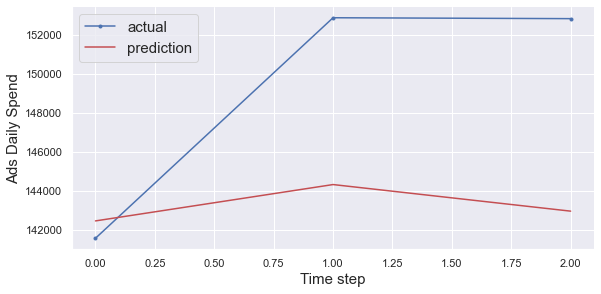

In [50]:
test_predict = model.predict(testX)
prediction_plot(testY, test_predict)

## **GRU and BiLSTM Models** 

In [51]:
df=pd.read_excel('Walmart Quarterly Revenue.xlsx')
df.head()

,Date,Quarterly Revenue
0,2009-01-31,108627
1,2009-04-30,94242
2,2009-07-31,100876
3,2009-10-31,99373
4,2010-01-31,113594


In [52]:
df = df.set_index('Date')
df.head()

,Quarterly Revenue
Date,
2009-01-31,108627
2009-04-30,94242
2009-07-31,100876
2009-10-31,99373
2010-01-31,113594


In [53]:
# Split train data and test data
train_size = int(len(df)*0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [54]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [55]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 4
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (40, 4, 1)
y_train.shape:  (40, 1)
X_test.shape:  (8, 4, 1)
y_test.shape:  (8, 1)


In [56]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [57]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
2/2 [==============================] - 3s 604ms/step - loss: 0.2240 - val_loss: 0.3596
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1307 - val_loss: 0.2115
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0726 - val_loss: 0.1028
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0423 - val_loss: 0.0369
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0261 - val_loss: 0.0171
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0322 - val_loss: 0.0242
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0418 - val_loss: 0.0271
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0453 - val_loss: 0.0213
Epoch 9/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0284 - val_loss: 0.0175
Epoch 10/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0182 - val_loss: 0.0204
Epoch 11/100
2/2 [

In [58]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.2862 - val_loss: 0.5206
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 0.2158 - val_loss: 0.3906
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.1541 - val_loss: 0.2712
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0992 - val_loss: 0.1632
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0531 - val_loss: 0.0751
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0227 - val_loss: 0.0236
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0170 - val_loss: 0.0206
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0329 - val_loss: 0.0349
Epoch 9/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0420 - val_loss: 0.0304
Epoch 10/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0341 - val_loss: 0.0190
Epoch 11/100
2/2 [===

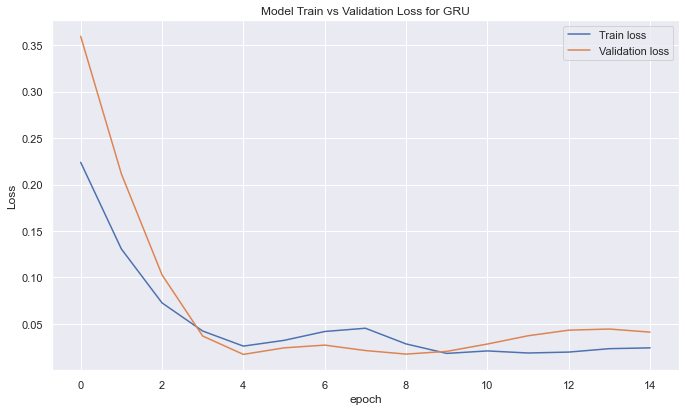

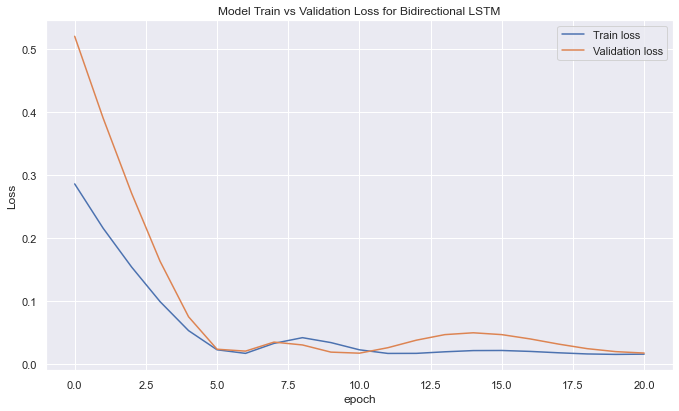

In [59]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

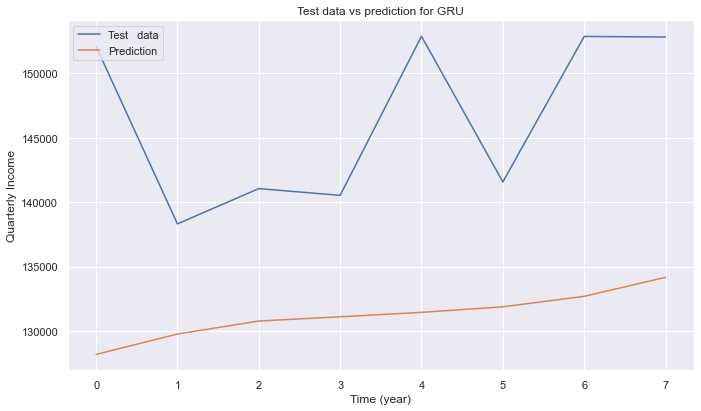

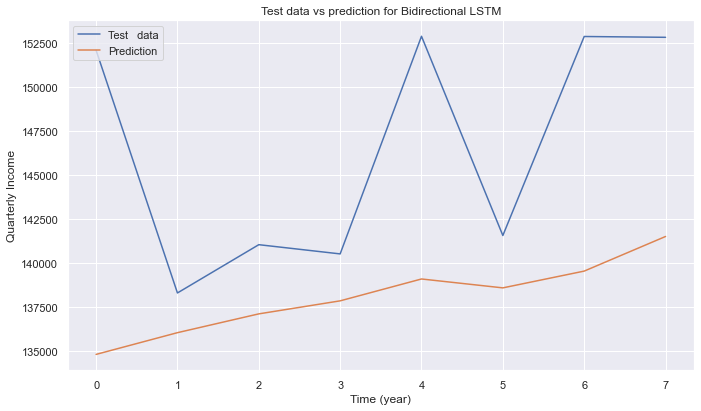

In [60]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(scaler.inverse_transform(y_test)), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (year)')
    plt.ylabel('Quarterly Income')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [61]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, scaler.inverse_transform(y_test), 'GRU')
evaluate_prediction(prediction_bilstm, scaler.inverse_transform(y_test), 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 15263.1260
Root Mean Square Error: 16381.6322

Bidirectional LSTM:
Mean Absolute Error: 8430.6992
Root Mean Square Error: 10176.7920



In [62]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(scaler.transform(prediction_gru), y_test, 'GRU')
evaluate_prediction(scaler.transform(prediction_bilstm), y_test, 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 0.3426
Root Mean Square Error: 0.3677

Bidirectional LSTM:
Mean Absolute Error: 0.1892
Root Mean Square Error: 0.2284



R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
